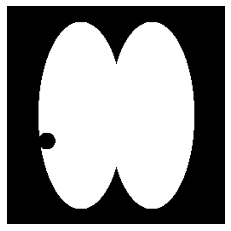

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.draw import ellipse

# Create a blank white image
width, height = 256, 256
image = np.zeros((height, width), dtype=np.uint8)

x = 110
y = 50
d = y / 1.2 # 1.1 - 1.2

# Define the center and axes for the ellipse
center1 = (256 / 2, 256 / 2 + d)  # (row, col)
center2 = (256 / 2, 256 / 2 - d)  # (row, col)
axis_lengths = (x, y)  # (vertical axis, horizontal axis) 90-110, 50-70

# Draw the ellipse
rr, cc = ellipse(center1[0], center1[1], axis_lengths[0], axis_lengths[1], shape=image.shape)
image[rr, cc] = 255  # Black color for the ellipse
rr, cc = ellipse(center2[0], center2[1], axis_lengths[0], axis_lengths[1], shape=image.shape)
image[rr, cc] = 255  # Black color for the ellipse

rr, cc = ellipse(center2[0] + 30, center2[1] - 40, 10, 10, shape=image.shape) # size - (10, 10) - (
image[rr, cc] = 0  # Black color for the ellipse

# Display the image using matplotlib
plt.imshow(image, cmap='gray')
plt.axis('off')  # Turn off axis for better visualization
plt.show()

# Optionally, save the image
# plt.imsave('ellipse_skimage.png', image, cmap='gray')


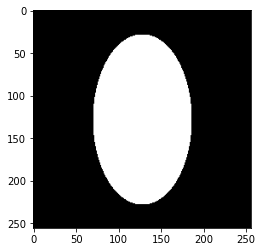

In [118]:
import random
import matplotlib.pyplot as plt
import numpy as np
from skimage.draw import ellipse

def create_artificial_lungs(min_r, max_r, min_c, max_c, width=256, height=256):
    img = np.zeros((height, width), dtype=np.uint8)
    r1 = random.randint(min_r, max_r)
    c1 = random.randint(min_c, max_c)
    y1, x1 = height / 2, width / 2
    rr, cc = ellipse(y1, x1, r1, c1, shape=img.shape)
    img[rr, cc] = 255
    return img
    
min_r = 90
max_r = 110
min_c = 50
max_c = 70
min_d_coeff = 1.1
max_d_coeff = 1.2

plt.imshow(create_artificial_lungs(min_r, max_r, min_c, max_c))

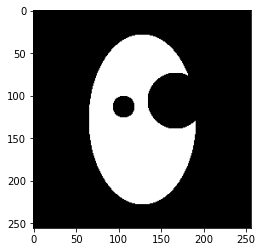

In [145]:
example_img = create_artificial_lungs(min_r, max_r, min_c, max_c)

def add_random_holes(img, min_num_of_holes, max_num_of_holes, min_size, max_size, min_dx, max_dx, min_dy, max_dy, width=256, height=256):
    num_of_holes = random.randint(min_num_of_holes, max_num_of_holes)
    for _ in range(num_of_holes):
        size = random.randint(min_size, max_size)
        dx = random.randint(min_dx, max_dx)
        dy = random.randint(min_dy, max_dy)
        y = height / 2 - dy
        x = width / 2 - dx
        rr, cc = ellipse(y, x, size, size, shape=img.shape)
        img[rr, cc] = 0
    return img

img = add_random_holes(example_img, 1, 4, 10, 40, -60, 60, -25, 25)
plt.gray()
plt.imshow(img)
        